In [ ]:
! pip install matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
import os
os.chdir("/workspaces/mlops1_hotel/mlops1_hotel")
df = pd.read_csv("artifacts/raw/train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
df.drop(columns=['Booking_ID'], inplace=True)

In [7]:
df.duplicated().sum()

np.int64(7661)

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(21359, 18)

In [9]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [11]:
# The data is imbalanced
cat_cols=['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest',
        'booking_status']
num_cols= ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'lead_time',
        'arrival_year', 'arrival_month', 'arrival_date',
        'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests']

len(cat_cols), len(num_cols)
# cat_cols = df.select_dtypes(include=['object']).columns
# num_cols = df.select_dtypes(exclude=['object']).columns
# cat_cols, num_cols

(6, 12)

## Data Analysis

In [12]:
data = df.copy()

### Univariate Analysis

In [13]:
def num_plot_dist(df, num_features): 
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5)) 
    
    # Ensure axes is always a 2D array for consistent indexing
    if len(num_features) == 1: 
        axes = [axes] 
    
    for i, column in enumerate(num_features): 
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, color="blue") 
        axes[i][0].set_title(f"Histogram for {column}") 
        sns.boxplot(data=df, x=column, ax=axes[i][1], color="blue") 
        axes[i][1].set_title(f"Box Plot for {column}") 
        
    plt.tight_layout() 
    plt.show()

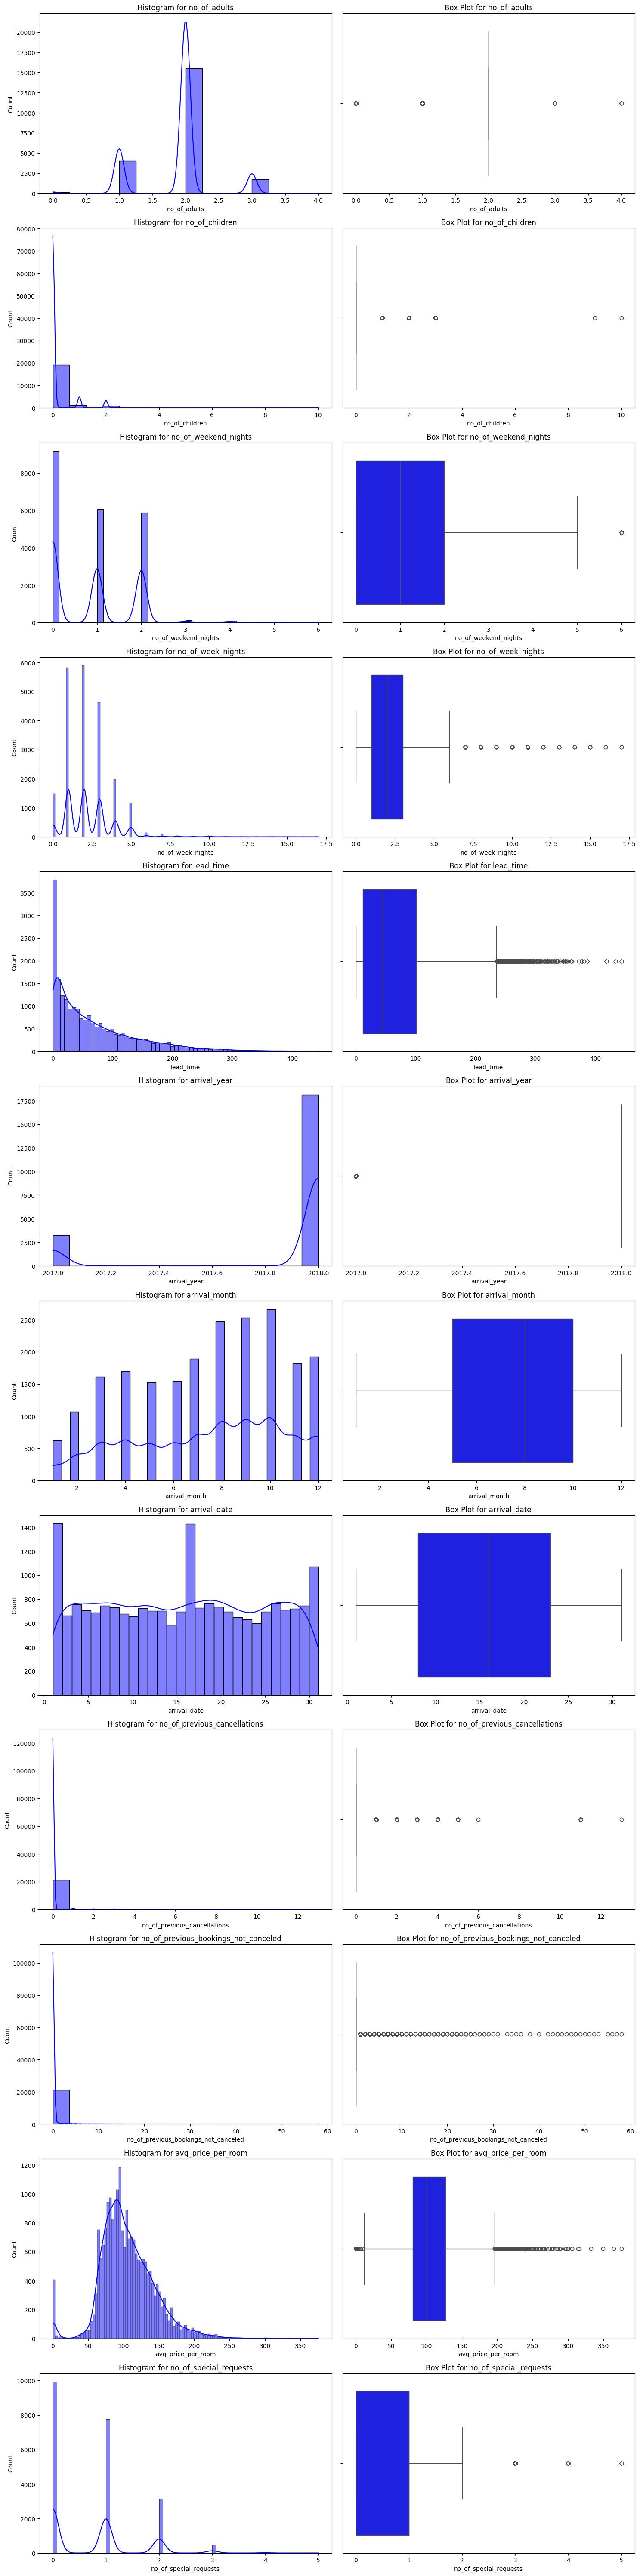

In [14]:
num_plot_dist(data, num_cols)

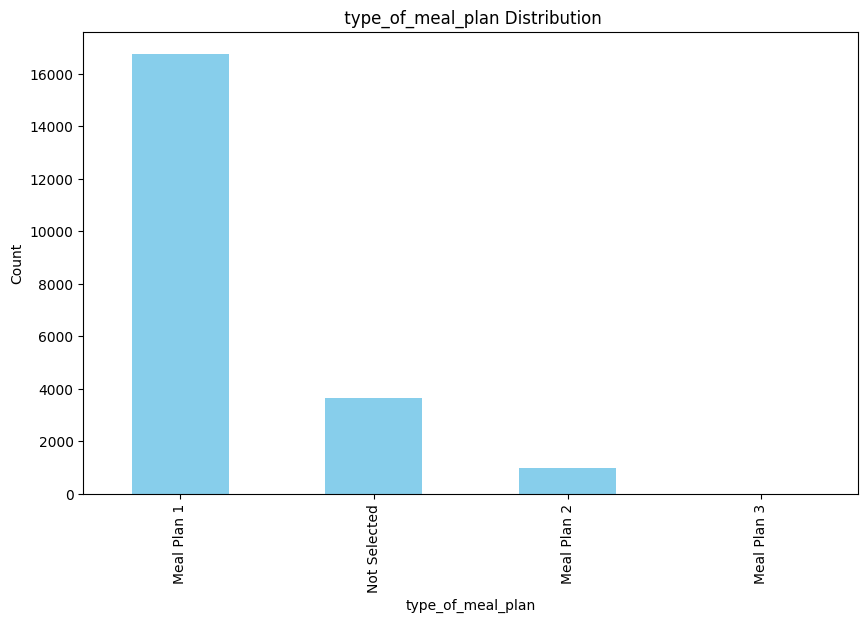

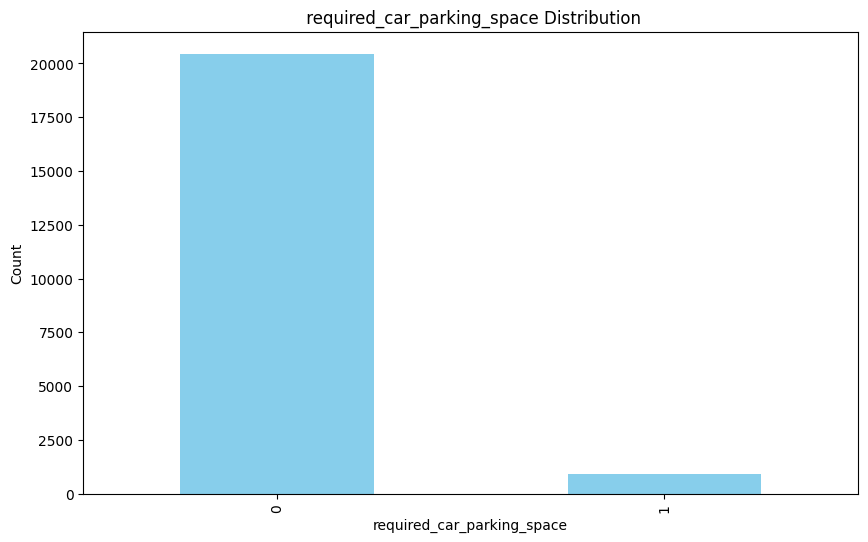

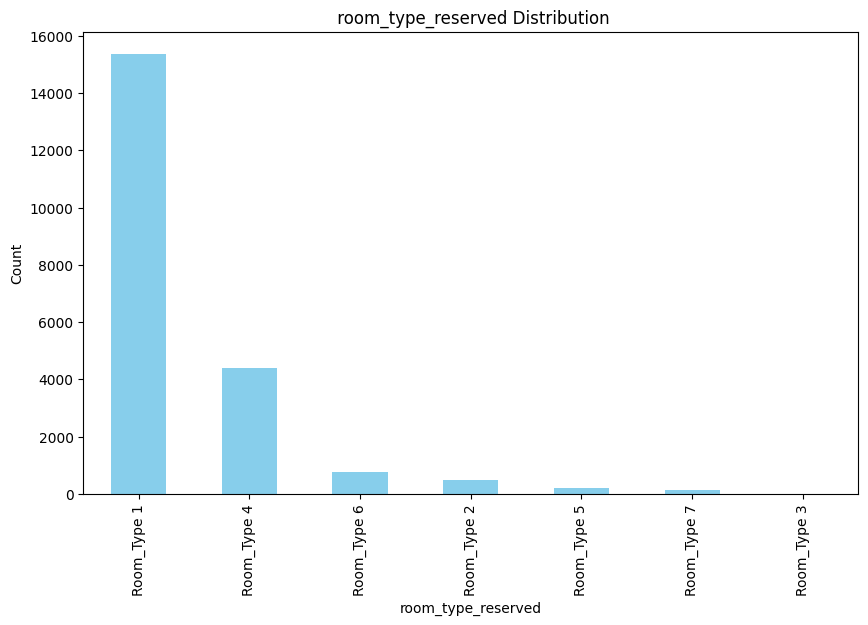

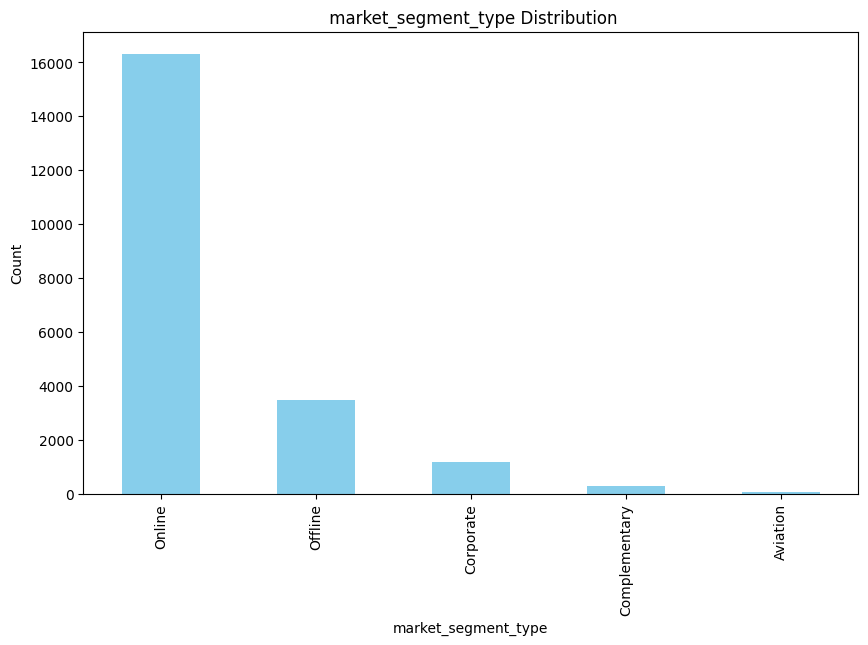

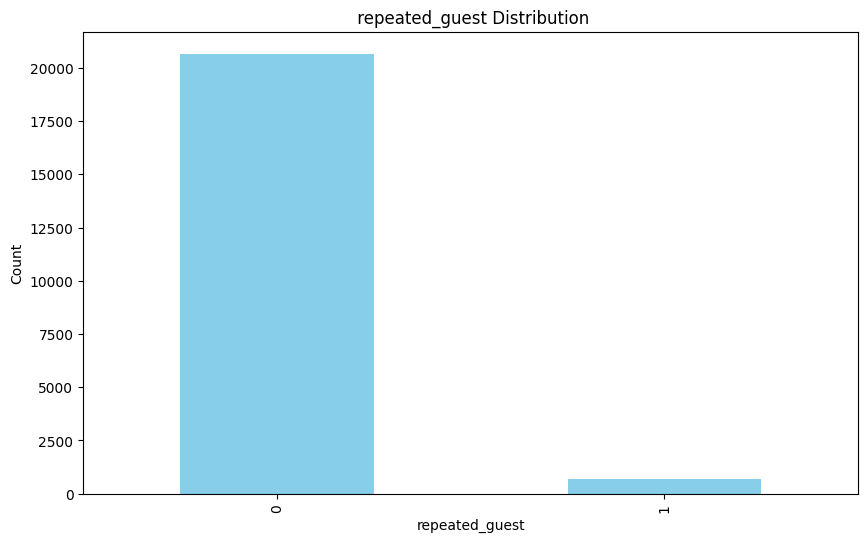

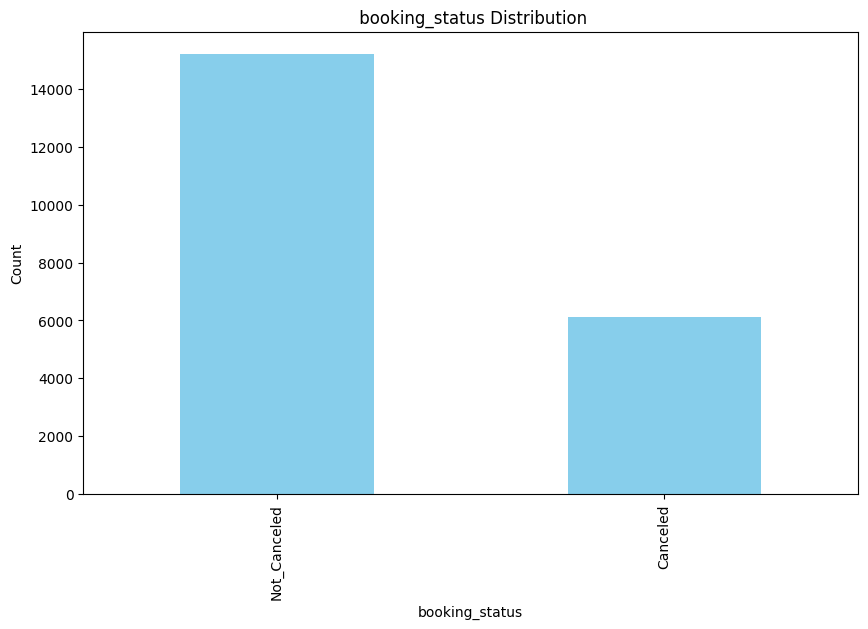

In [15]:
for cat_feature in cat_cols: 
    plt.figure(figsize=(10,6)) 
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue') 
    plt.title(f" {cat_feature} Distribution") 
    plt.xlabel(cat_feature) 
    plt.ylabel("Count") 
    plt.show() 
    

## Bivariate Analysis

In [16]:
def plot_bivariate_num(df, target, num_features): 
    num_plots = len(num_features) 
    num_rows = (num_plots+1)//2 

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5)) 
    axes = axes.flatten() 

    for i, column in enumerate(num_features): 
        sns.boxplot(x=target,y=column,ax=axes[i], data=df ,palette="Blues") 
        axes[i].set_title(f"{column} VS {target}") 
        
    plt.tight_layout() 
    plt.show()

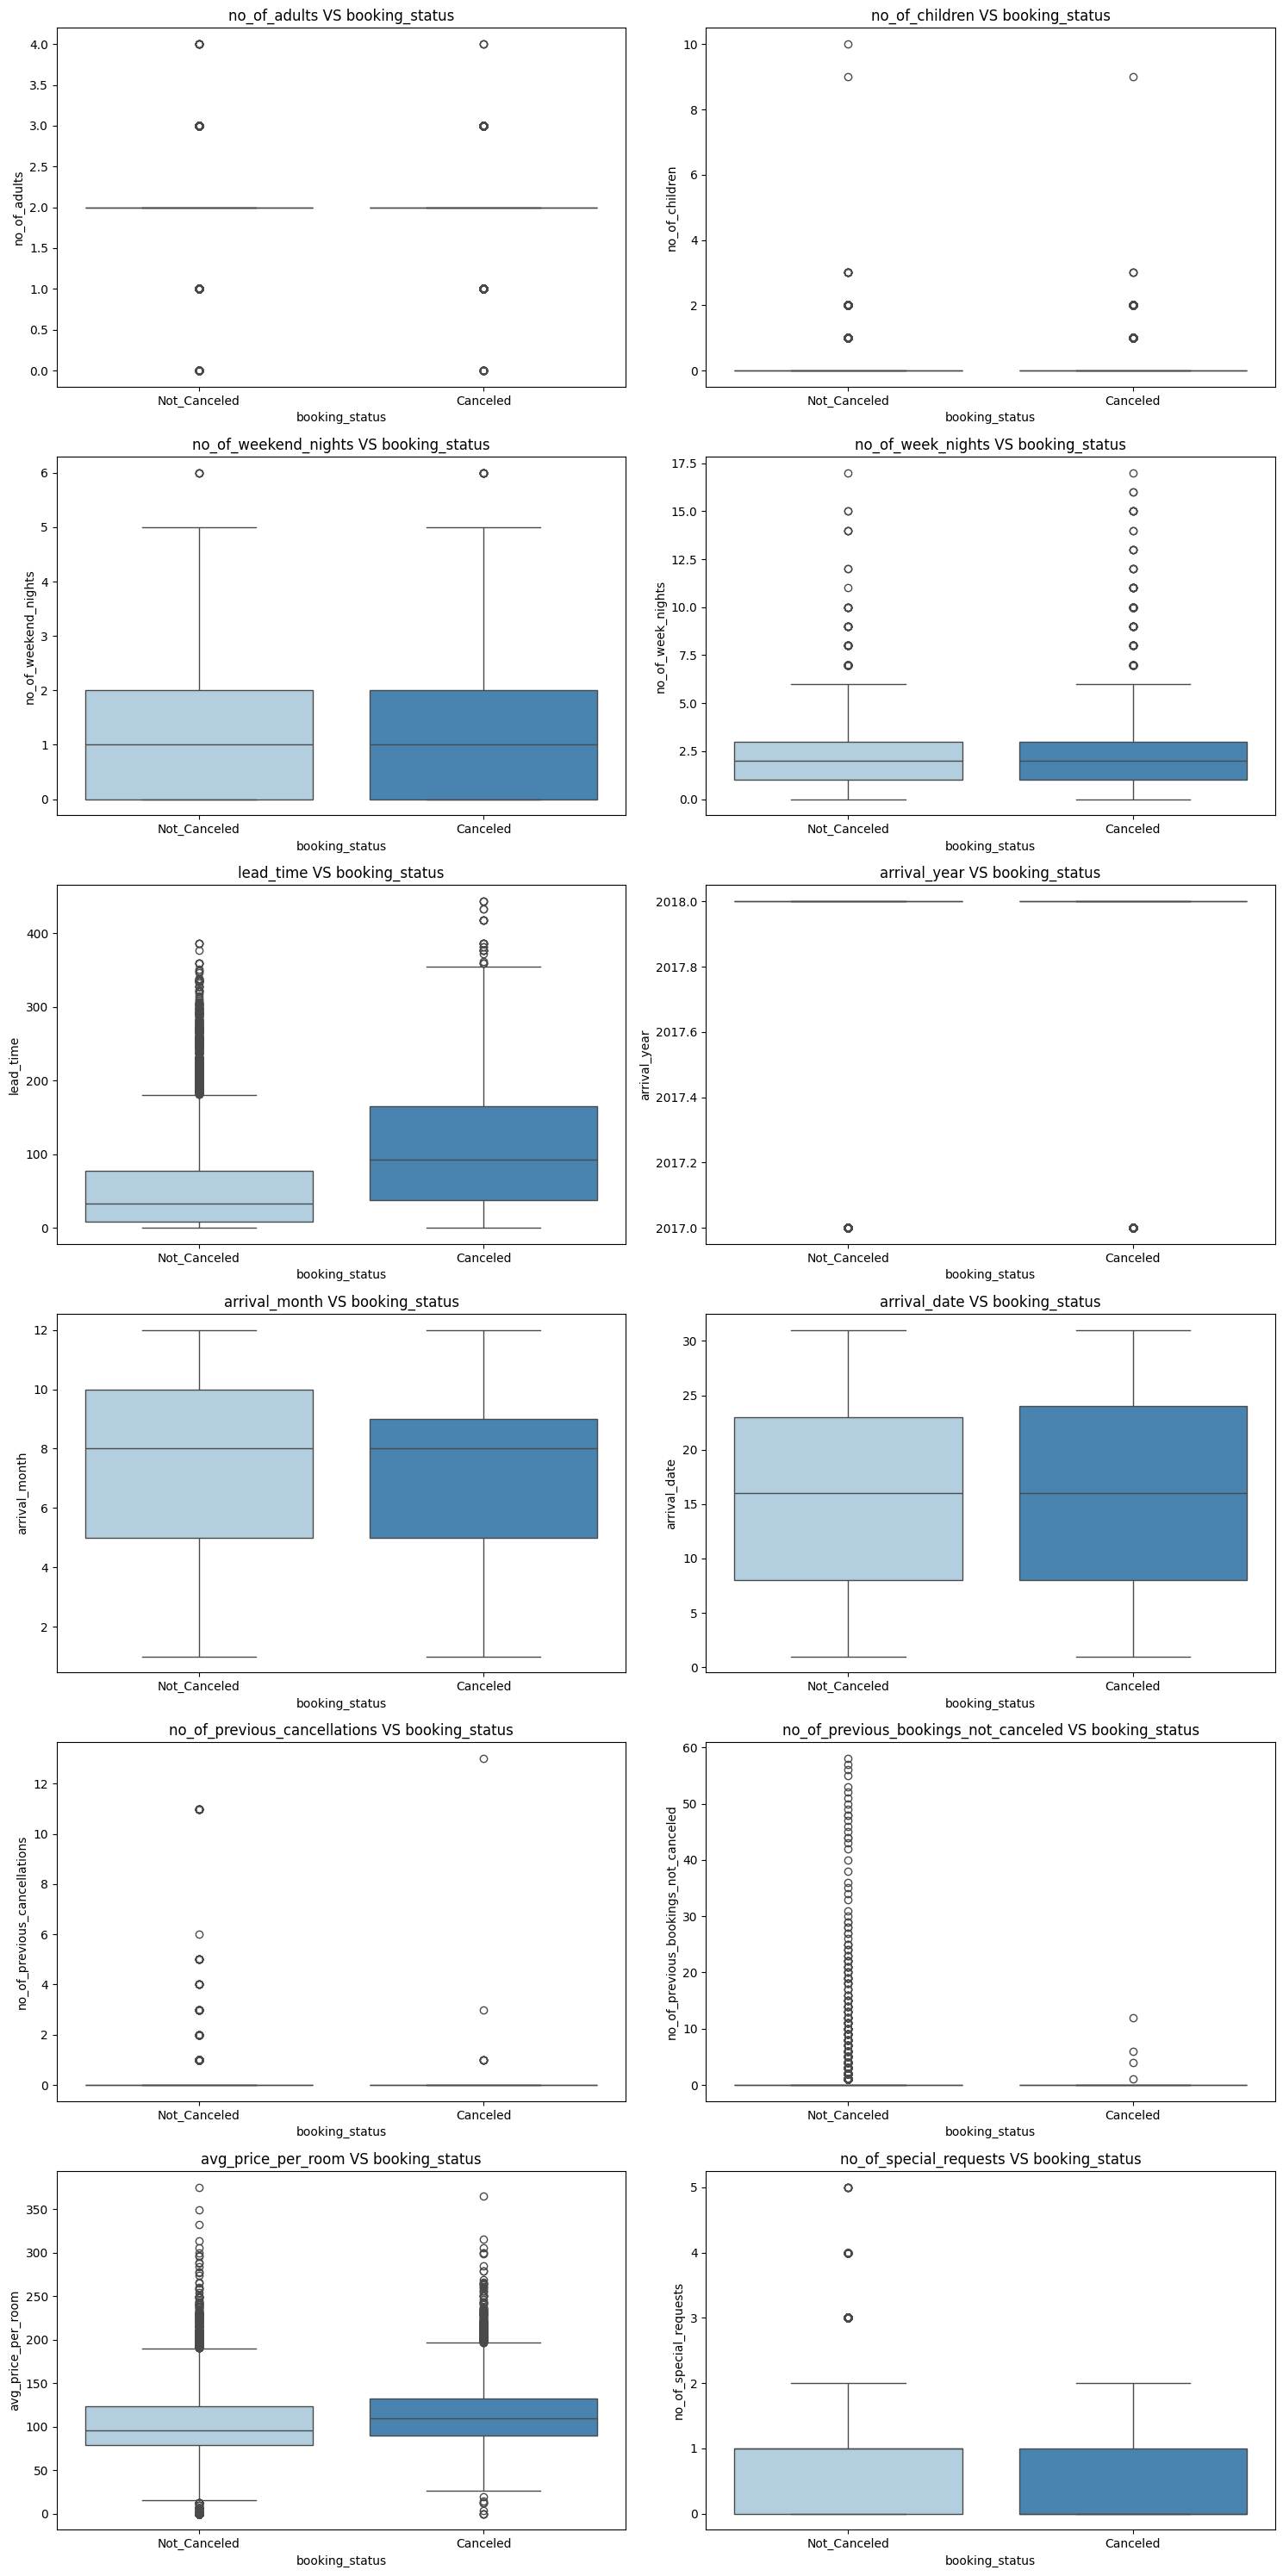

In [17]:
plot_bivariate_num(data, 'booking_status', num_cols)

In [18]:
def plot_bivariate_cat(df, target, cat_features): 
    num_features = len(cat_features) 
    num_rows = (num_features+1)//2 

    fig, axes= plt.subplots(num_rows, 2, figsize=(15, num_rows*5)) 
    axes = axes.flatten() 

    for i, feature in enumerate (cat_features): 
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax = axes[i]) 
        axes[i].set_title(f"{feature} VS {target}") 
        axes[i].tick_params(axis='x', rotation=90) 

    plt.tight_layout() 
    plt.show()

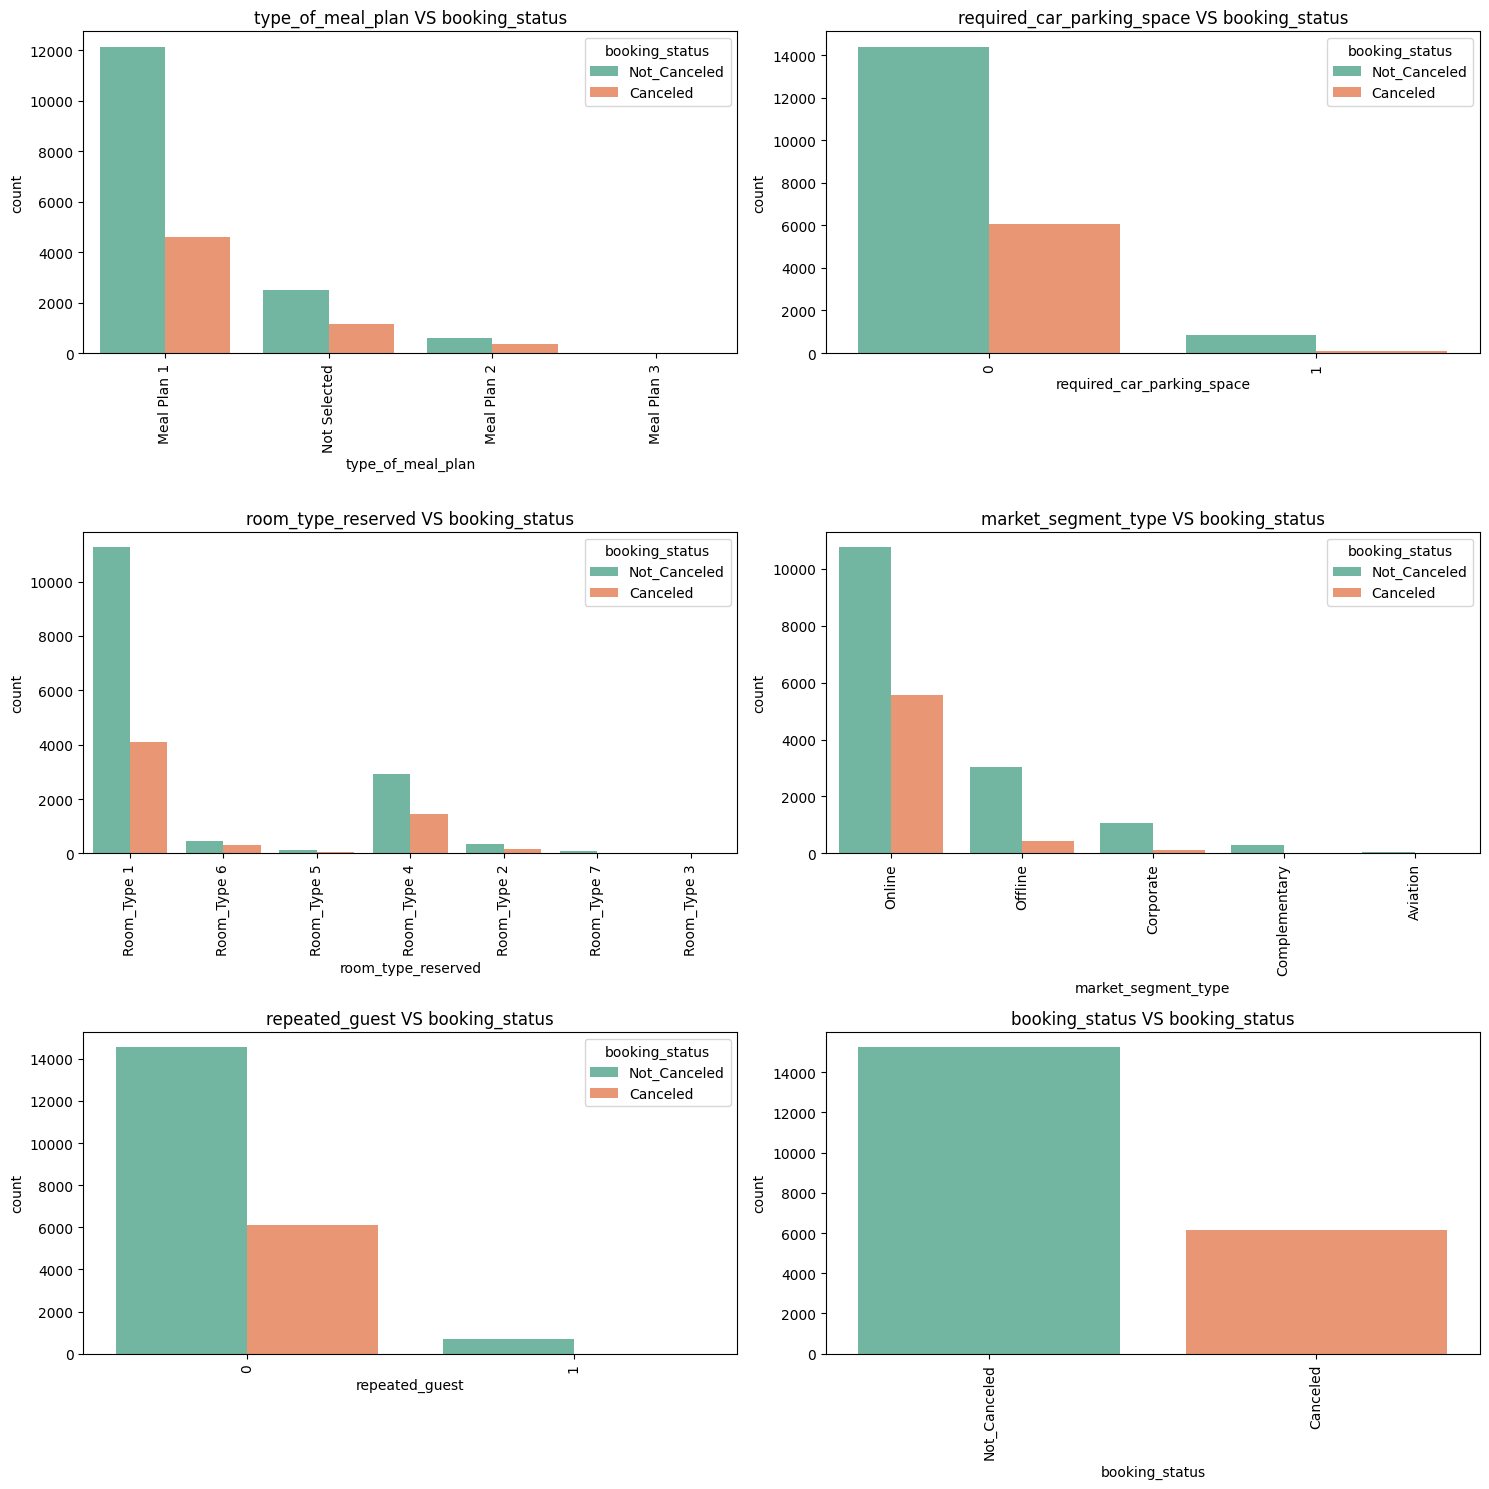

In [19]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

In [20]:
###### Label Encoding CAT Features ############
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()
mapping = {}

for col in cat_cols: 
    df[col] = LabelEncoder.fit_transform(df[col]) 
    mapping[col] = {label : code for label, code in zip(LabelEncoder.classes_, LabelEncoder.transform(LabelEncoder.classes_))}
    print(f"{col} : {mapping[col]}")

type_of_meal_plan : {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}
required_car_parking_space : {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
room_type_reserved : {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}
market_segment_type : {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}
repeated_guest : {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
booking_status : {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}


In [ ]:
#### Mutlticollinearity check #### between input features
! pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [23]:
x = add_constant(df)
vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [24]:
#### As the value is leass than 10, we can proceed with the model building##### NO multicolinearity

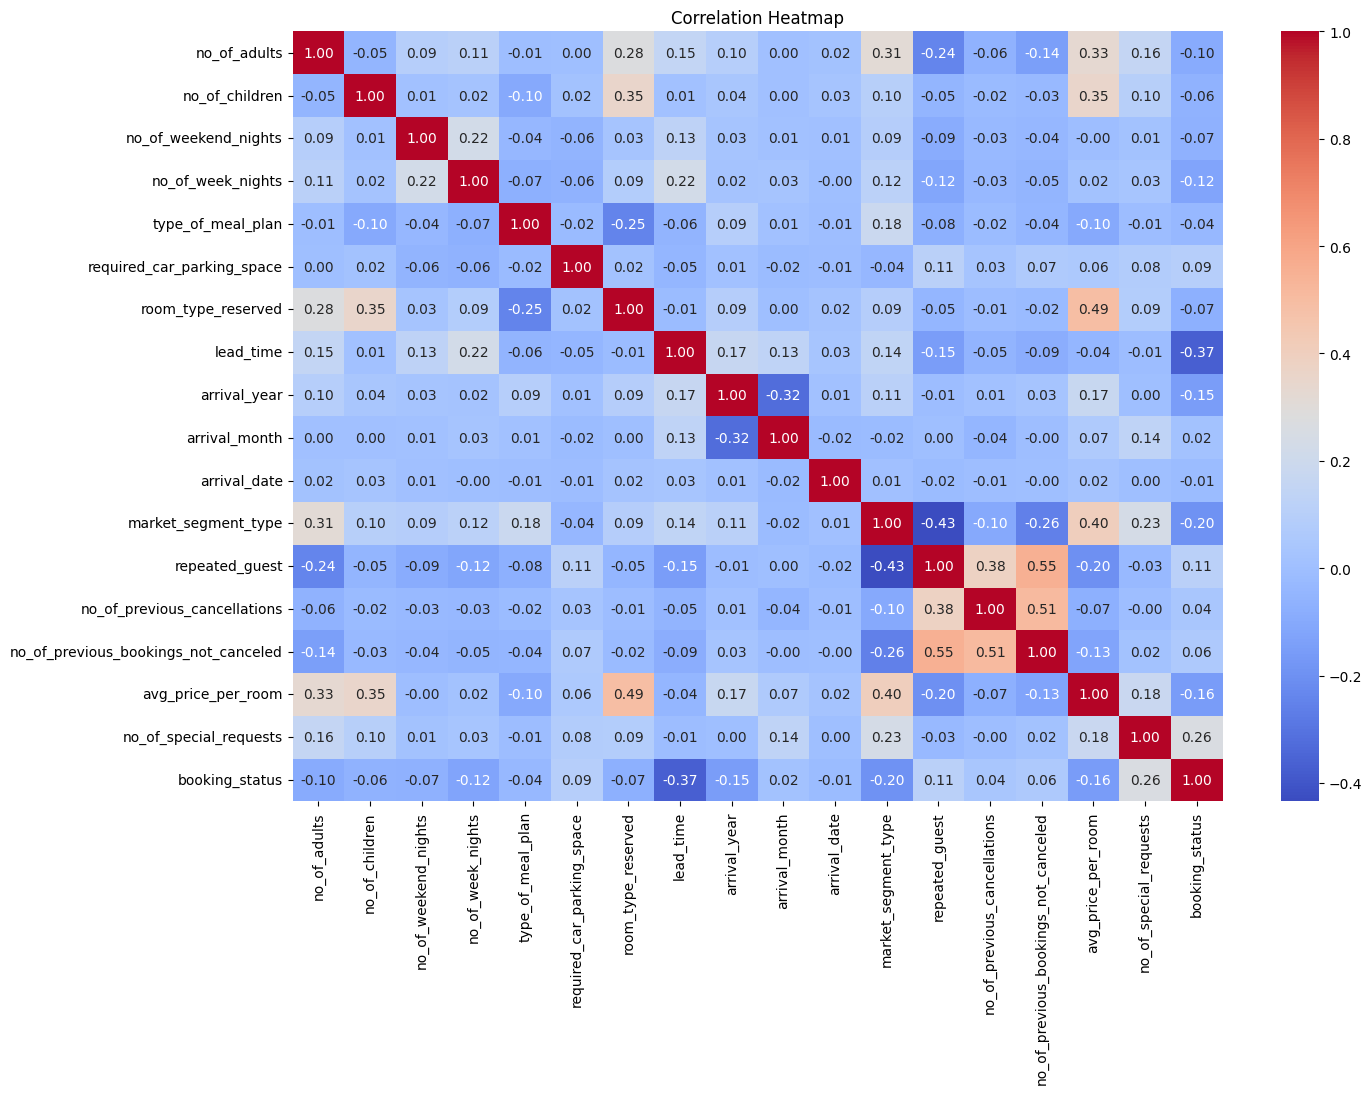

In [25]:
corr = df.corr()
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [26]:
##### Skewness check #####
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [27]:
for col in df.columns:
    if skewness[col] >5:
        #apply log transformation
        df[col] = np.log1p(df[col])

In [28]:
###### Imbalanced data check ######
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [29]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [30]:
### will do oversampling as undersampling will make the data around 12k  ###############
! pip install imbalanced-learn



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [31]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [33]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [34]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res
balanced_df.shape

(30462, 18)

In [35]:
df = balanced_df.copy()


In [36]:
####### Feature Selection #######
len(df.columns)

18

In [37]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(columns=['booking_status'])
y = df['booking_status']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [38]:
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 
                                       'Importance': feature_importances})

In [39]:
top_importance_feature_df = feature_importances_df.sort_values(by='Importance', ascending=False)
top_importance_feature_df

,Feature,Importance
7,lead_time,0.260226
16,no_of_special_requests,0.183688
15,avg_price_per_room,0.150109
9,arrival_month,0.085296
10,arrival_date,0.084464
11,market_segment_type,0.057997
3,no_of_week_nights,0.044419
2,no_of_weekend_nights,0.030316
4,type_of_meal_plan,0.020648
6,room_type_reserved,0.020059


In [40]:
top_10_features = top_importance_feature_df["Feature"].head(10).values
top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [41]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [42]:
len(top_10_df.columns)

11

In [43]:
df = top_10_df.copy()

In [44]:
######### Model selection ##########
! pip install xgboost lightgbm 


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [46]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

In [49]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [50]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [51]:
metrics_df = pd.DataFrame(metrics)
metrics_df.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.891679,0.892508,0.892508,0.892508
4,XGBoost,0.870343,0.866324,0.878176,0.872210
5,LightGBM,0.866732,0.851494,0.890879,0.870742
3,GradientBoosting,0.837190,0.821473,0.864821,0.842590
9,DecisionTree,0.840801,0.850000,0.830619,0.840198
2,AdaBoost,0.804202,0.821294,0.781433,0.800868
1,LogisticRegression,0.774331,0.802787,0.731922,0.765718
8,GaussianNB,0.773346,0.803232,0.728664,0.764133
7,KNeighbors,0.779583,0.856376,0.675896,0.755507
6,SVC,0.720335,0.729657,0.706840,0.718068


In [52]:
###### Train our RF model with hyperparameter tuning ######
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = df.drop(columns=['booking_status'])
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
rf = RandomForestClassifier(random_state=42)

In [54]:
params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True, False],
}

In [55]:
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=params_dist,
                                   n_iter=5,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   scoring='accuracy',
                                   n_jobs=-1)

In [56]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.4s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799cbdb4b680>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799cb914c710>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799cbdb48650>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799cbdb49490>},
                   random_state=42, scoring='accuracy', verbose=2)

In [57]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [58]:
best_rf = random_search.best_estimator_

In [59]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8921713441654358
Precision: 0.8898222940226171
Recall: 0.8970684039087948
F1 Score: 0.8934306569343066


In [60]:
import joblib
joblib.dump(best_rf, 'rf_model.pkl')
loaded_model = joblib.load('rf_model.pkl')